##This script contains the following:
###1. Importing visualisation libraries and Data
###2. Exploring relationships:
-Correlations
-Scatterplots
-Pair plots
-Categorical plots

###1. Importing visualisation libraries and Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.
###To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. \n",
###Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed."

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to \"call\" them specifically.\n",
%matplotlib inline

In [4]:
#import data:#reimporting data with a fix for reading the NAN values [dtype={'Indirect GHG Emissions (Metric Tons CO2e) ': pd.np.float64}, na_values=[' --'])] 
df=pd.read_csv(r'C:\Users\chloe\Documents\05.2023 project\02 Data\Prepared data\WorldAQI_Clean.csv', index_col = False)

cleaning and analysis

#df_adj_wo = df_adj_wo.replace(['Not available'], ''), inplace=True
df['Indirect GHG Emissions per Metric Ton CO2e'] = df['Indirect GHG Emissions per Metric Ton CO2e'].replace(['Not available', '0.0'], '0')

#check:
df['Indirect GHG Emissions per Metric Ton CO2e'].value_counts(dropna=False)

In [5]:
df.dtypes

Unnamed: 0              int64
Country                object
City                   object
AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

In [7]:
#function for checking whether a datarame contains any mixed-type columns:
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [12]:
#in order to rename columns, use the following syntax: df.rename(columns = ['old_name':'new_nme'}, in place = True])
df.rename(columns = {'lat)':'Latitude'}, inplace = True)
df.rename(columns = {'lng)':'Longitude'}, inplace = True)
#in place=true means to overwrite the original column name with the new one

#there are no mixed columns

In [13]:
#functionfor fnding missing values: df['variable'].value_counts(dropna = False)
df.columns

Index(['Unnamed: 0', 'Country', 'City', 'AQI Value', 'AQI Category',
       'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [14]:
df.shape

(16393, 15)

In [15]:
#consistency checks on df_drop dataframe
df.describe()

,Unnamed: 0,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000
mean,8348.243214,63.227902,1.349356,31.794424,3.851156,60.075520,30.330645,-4.223929
std,4819.971171,43.297779,2.390045,22.975905,5.911545,43.378779,22.922043,72.909196
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-159.771000
25%,4178.000000,39.000000,1.000000,20.000000,0.000000,34.000000,16.730000,-75.283300
50%,8353.000000,52.000000,1.000000,29.000000,2.000000,52.000000,38.880300,5.601900
75%,12522.000000,69.000000,1.000000,38.000000,5.000000,69.000000,46.800000,36.183300
max,16694.000000,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


#There is a huge range in the air quality between different cities and countries. 
#PM2.5 has the highest rate across all geographical areas
#the lowest AQI Value is 7000000, and the highest 500.000000.

In [17]:
df.median()

C:\Users\Chloe\AppData\Local\Temp\ipykernel_6284\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Unnamed: 0         8353.0000
AQI Value            52.0000
CO AQI Value          1.0000
Ozone AQI Value      29.0000
NO2 AQI Value         2.0000
PM2.5 AQI Value      52.0000
lat                  38.8803
lng                   5.6019
dtype: float64

#PM2.5 has a much higher value than Caron Dioide level.

In [19]:
#save the clean data
df.to_csv("C:/Users/chloe/Documents/02.2023 Instacart Basket Analysis/02 Data/Prepared Data/WorldAQI_checked.csv")

# Exploring Relationships: Correlations:

# Create a correlation matrix using pandas


In [20]:
df.corr()

,Unnamed: 0,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
Unnamed: 0,1.000000,-0.007824,-0.004225,0.021359,-0.015068,-0.009939,0.010511,0.011359
AQI Value,-0.007824,1.000000,0.458529,0.328959,0.308275,0.980604,-0.101673,0.155514
CO AQI Value,-0.004225,0.458529,1.000000,0.039960,0.398974,0.458980,-0.077734,0.003489
Ozone AQI Value,0.021359,0.328959,0.039960,1.000000,-0.252301,0.234705,0.247768,0.323898
NO2 AQI Value,-0.015068,0.308275,0.398974,-0.252301,1.000000,0.340821,0.038933,-0.290050
PM2.5 AQI Value,-0.009939,0.980604,0.458980,0.234705,0.340821,1.000000,-0.127804,0.118152
lat,0.010511,-0.101673,-0.077734,0.247768,0.038933,-0.127804,1.000000,-0.021740
lng,0.011359,0.155514,0.003489,0.323898,-0.290050,0.118152,-0.021740,1.000000


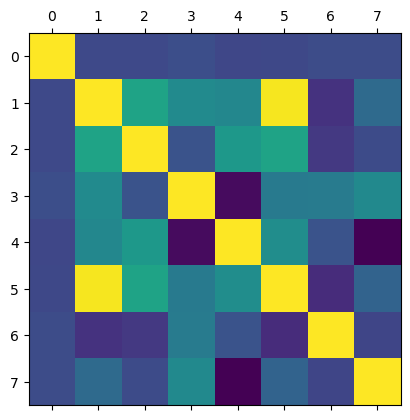

In [21]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

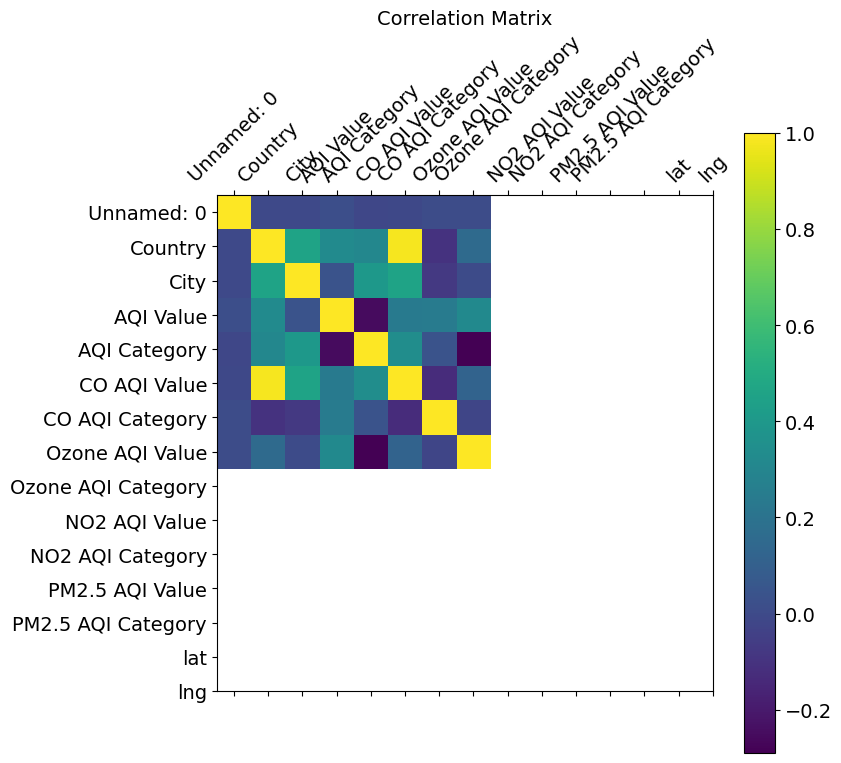

In [22]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

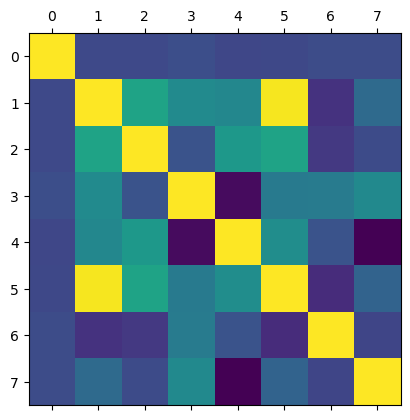

In [23]:
# Save figure in the current working directory'cwd = os.getcwd()', 'cwd': ('C:\\Users\\Chloe\\Documents\\05.2023 project\\03 Scripts')
plt.matshow(df.corr())
plt.savefig('AQIcorr.png')

#### Create a correlation heatmap using seaborn

In [24]:
df.columns

Index(['Unnamed: 0', 'Country', 'City', 'AQI Value', 'AQI Category',
       'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [25]:
# Create a subset excluding the \"lat\" and \"Lng\" columns
sub = df[['Country','City', 'AQI Value','CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value','PM2.5 AQI Value']]

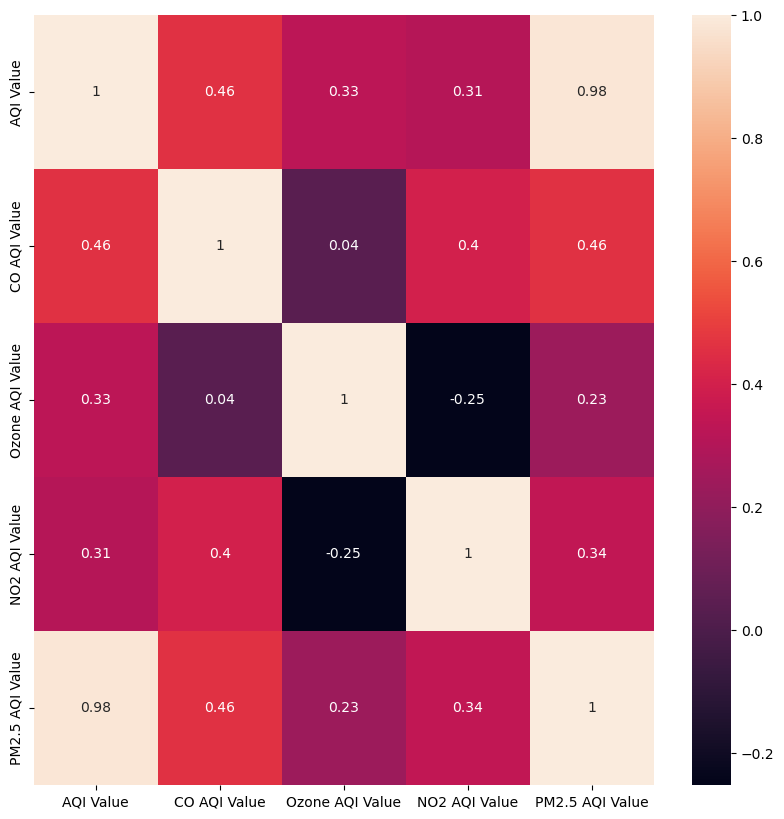

In [26]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap."

#### Scatterplots:

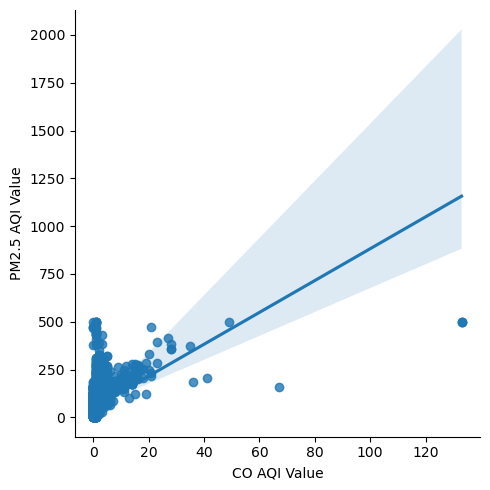

In [28]:
# Create a scatterplot for the \"CO AQI Value\" and \"PM2.5 AQI Value" columns in seaborn\n",
sns.lmplot(x = 'CO AQI Value', y = 'PM2.5 AQI Value', data = df)

#There is a correlation between higher rates of CO and igher rates of PM2.5, ut lots of data ppoints at the lower level of the chart reflects that some countries/cities with very low levels of CO still have very high levels of PM2.5. There are two outliers: one reflects very high CO and PM2.5, the other is somewhat against the trend, with high CO but relatively lowPM2.5. It would e interesting to find the reason for this.  

#### Pair Plots

In [31]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['Ozone AQI Value', 'AQI Value', 'CO AQI Value', 'PM2.5 AQI Value']]

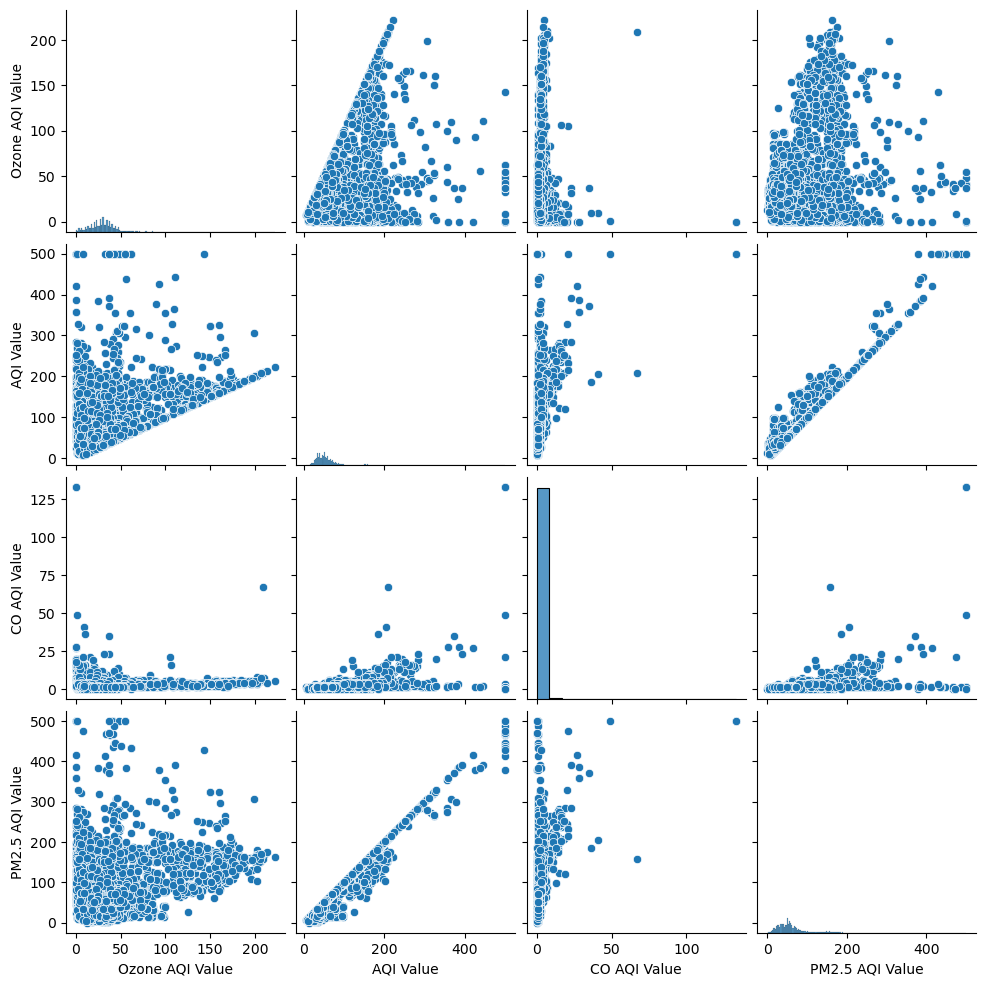

In [32]:
# Create a pair plot 
g = sns.pairplot(sub_2)

####There's almost a direct correlation between PM2.5 and overal AQI levels, whereas contrary to expectations, CO levels have much less of an overal affect on AQI levels. OVeral PM2.5 levels are low in all coutries and cities in the dataase.
#there is a direct negative correlation between ozone AQI value and overall AQI level. There are a few distinct outliers visible in the plots:it would be interesting to take a closer look at these cases.

### Categorical Plots:
##### Creating a categorical variable that splits the \"Largest Property Use Type\" column into categories"

#####Use a histogram to visualize the distribution of the variables to determine sensible categories for the property use type
####### You don't want to end up with too few observations in any one of the categories.\n",
####### The argument \"kde\" adds a line that encompasses the distribution
#In this example, categories have already been included in the chart, so this step is unnecessary
sns.histplot(df_drop['Electricity Use - Grid Purchase (kBtu)'], bins = 200000, kde = True)"

In [34]:
df['AQI Category'].value_counts(dropna = False)

Good                              7513
Moderate                          6964
Unhealthy                          864
Unhealthy for Sensitive Groups     859
Very Unhealthy                     131
Hazardous                           62
Name: AQI Category, dtype: int64

In [35]:
df.columns

Index(['Unnamed: 0', 'Country', 'City', 'AQI Value', 'AQI Category',
       'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

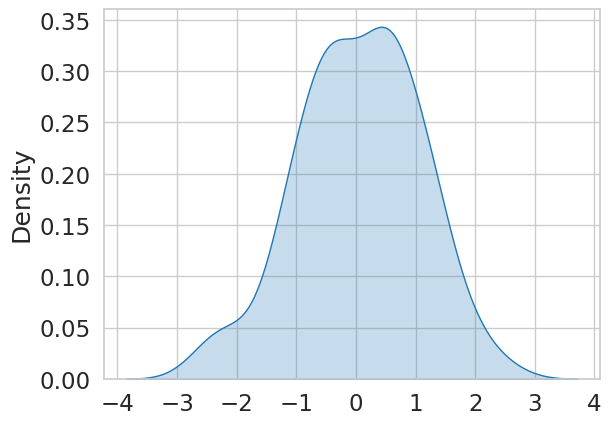

In [55]:
# Create a categorical plot in seaborn using the categories above
x = np.random.normal(size=100)
with sns.axes_style("whitegrid"), sns.plotting_context("notebook", font_scale=1.5):
    sns.kdeplot(x, shade=True)

In [ ]:
sns.set(style=\"ticks\")
    g = sns.catplot(x=\"AQI Value\", y=\"Country\", hue=\"AQI category\", data=df)

In [59]:
#Again, the image will be saved in the working directory
Figure 2=g.get_figure()
g.savefig(\'WorldAQIout.png'\)

AttributeError: 'PairGrid' object has no attribute 'get_figure'

In [ ]:
#What information can be gleaned about how to reduce energy in buildings in NY?
#How does energy useage differ between office spaces, schools and family units?
#How does energy reduction practice differ for office spaces or for family units?
#which outliers are there and what differs about these buildings?
